In [10]:
#Generation of the dataset, pre-steps, and construction of the Gradient Descent Algorithm

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(3)

x,y=make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1)

X=np.hstack((x,np.ones((x.shape[0],1))))

y=y.reshape((y.shape[0]),1)

def model(X,parameters):
    z=np.dot(X,parameters)
    f=1/(1+np.exp(-z))
    return f

def cost_function(X,y,parameters):
    m=len(y)
    return (1/m)*np.sum(-y*np.log(model(X,parameters))-(1-y)*np.log(1-model(X,parameters)))

def grad(x,X,y,parameters):
    m=len(y)
    grad=[]
    for i in range(x.shape[1]):
        column=x[:,i].reshape((x.shape[0],1))
        grad_w = (1/m)*np.sum((model(X,parameters)-y)*column)
        grad.append(grad_w)
    grad_b = (1/m)*np.sum(model(X,parameters)-y)
    grad.append(grad_b)
    grad=np.array(grad).reshape(len(grad),1)
    return grad


def grad_descent(x,X,y,parameters, learning_rate, n_iterations, tolerance):
    cost_history=[]
    N_step=[]
    for i in range(n_iterations):
        gradient=grad(x,X,y,parameters)
        if np.linalg.norm(gradient) < tolerance:
            break
        parameters=parameters-learning_rate*gradient
        cost_history.append(cost_function(X,y,parameters))
        N_step.append(i)
    return parameters, cost_history, N_step


final parameters are w1=[-1.15082137] w2=[-4.05752843] and b=[0.4129856]
The final cost obtained is 0.11457933760477042
Confusion matrix is [[47  1]
 [ 2 50]]
Accuracy is 0.97
Precision is 0.9591836734693877
Recall is 0.9791666666666666
F1 score is 0.9690721649484536


Text(0.5, 1.0, 'Evolution of the cost in function of the number of iterations')

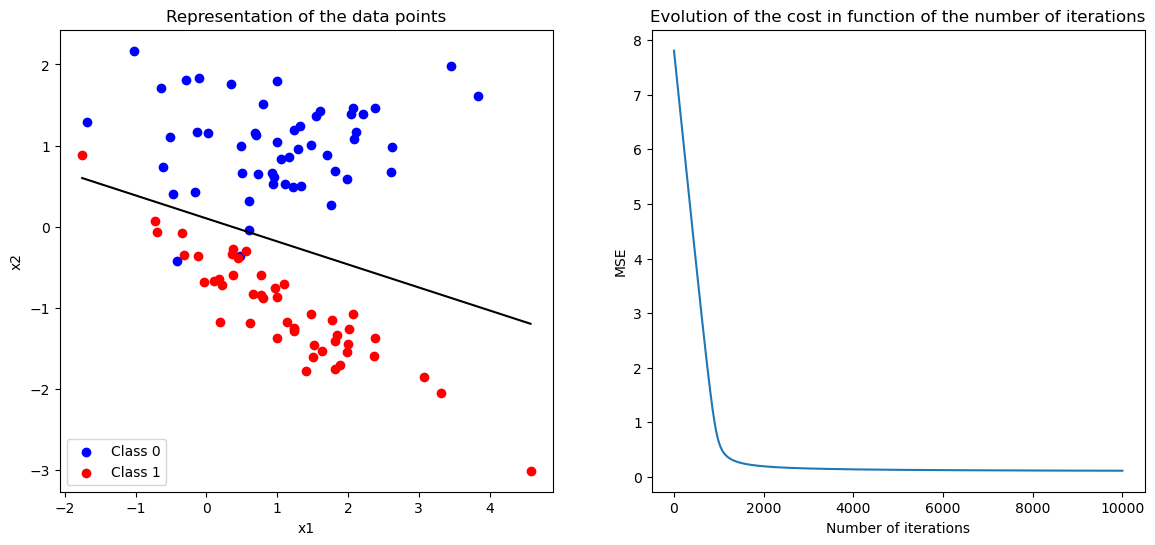

In [11]:
#Results with initial values of parameters such as w1=5, w2=5 and b=5

parameters=np.array([[5],[5],[5]])
learning_rate=0.01
n_iterations=10000
tolerance=1e-6

final_parameters, cost_history, N_step=grad_descent(x,X, y, parameters, learning_rate, n_iterations, tolerance)

print(f"final parameters are w1={final_parameters[0]} w2={final_parameters[1]} and b={final_parameters[2]}")
print(f"The final cost obtained is {cost_function(X,y,final_parameters)}")


def predictions(X,parameters):
    predictions = np.where(model(X,parameters) >= 0.5, 1, 0)
    return predictions

final_predictions=predictions(X,final_parameters)

TP=[]
TN=[]
FP=[]
FN=[]

for i,j in zip(final_predictions,y):
    if i==1 and j==1:
        TP.append(i)
    elif i==1 and j==0:
        FP.append(i)
    elif i==0 and j==0:
        TN.append(i)
    elif i==0 and j==1:
        FN.append(i)

NTP=len(TP)
NTN=len(TN)
NFP=len(FP)
NFN=len(FN)

confusion_matrix=np.array([[NTP,NFN],[NFP,NTN]])
print(f"Confusion matrix is {confusion_matrix}")

Accuracy=(NTP+NTN)/(NTP+NTN+NFP+NFN)
Precision=NTP/(NTP+NFP)
Recall=NTP/(NTP+NFN)
F1_score=2*((Precision*Recall)/(Precision+Recall))

print(f"Accuracy is {Accuracy}")
print(f"Precision is {Precision}")
print(f"Recall is {Recall}")
print(f"F1 score is {F1_score}")



x_boundary=np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_boundary=(-final_parameters[2]-final_parameters[0]*x_boundary)/final_parameters[1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(x[:,0][y.ravel() == 0], x[:,1][y.ravel() ==0], color='blue', label='Class 0')
ax1.scatter(x[:,0][y. ravel() == 1], x[:,1][y.ravel() ==1],color='red', label='Class 1')
ax1.legend()
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Representation of the data points")
ax1.plot(x_boundary,y_boundary, color="black")


ax2.plot(N_step, cost_history)
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("MSE")
ax2.set_title("Evolution of the cost in function of the number of iterations")

C:\Users\sh032\AppData\Local\Temp\ipykernel_2704\2510396873.py:22: RuntimeWarning: divide by zero encountered in log
  return (1/m)*np.sum(-y*np.log(model(X,parameters))-(1-y)*np.log(1-model(X,parameters)))
C:\Users\sh032\AppData\Local\Temp\ipykernel_2704\2510396873.py:22: RuntimeWarning: invalid value encountered in multiply
  return (1/m)*np.sum(-y*np.log(model(X,parameters))-(1-y)*np.log(1-model(X,parameters)))


final parameters are w1=[-0.2782216] w2=[-1.29082914] and b=[0.48758371]
The final cost obtained is 0.2932102360734027
Confusion matrix is [[47  1]
 [ 4 48]]
Accuracy is 0.95
Precision is 0.9215686274509803
Recall is 0.9791666666666666
F1 score is 0.9494949494949494


Text(0.5, 1.0, 'Evolution of the cost in function of the number of iterations')

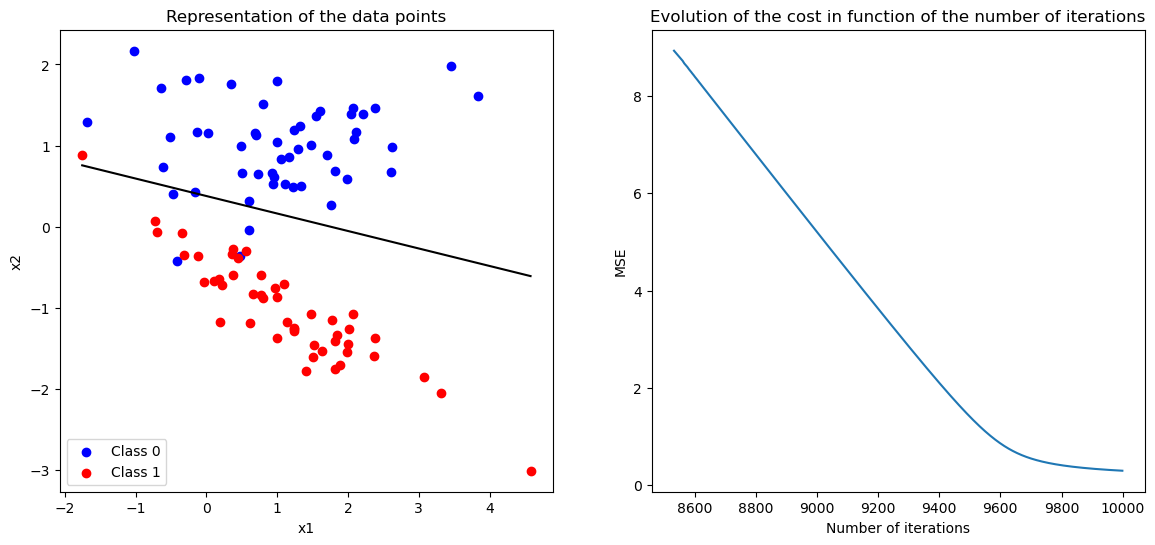

In [12]:
#Results with initial values of parameters such as w1=50, w2=50 and b=50


parameters=np.array([[50],[50],[50]])
learning_rate=0.01
n_iterations=10000
tolerance=1e-6

final_parameters, cost_history, N_step=grad_descent(x,X, y, parameters, learning_rate, n_iterations, tolerance)

print(f"final parameters are w1={final_parameters[0]} w2={final_parameters[1]} and b={final_parameters[2]}")
print(f"The final cost obtained is {cost_function(X,y,final_parameters)}")


def predictions(X,parameters):
    predictions = np.where(model(X,parameters) >= 0.5, 1, 0)
    return predictions

final_predictions=predictions(X,final_parameters)

TP=[]
TN=[]
FP=[]
FN=[]

for i,j in zip(final_predictions,y):
    if i==1 and j==1:
        TP.append(i)
    elif i==1 and j==0:
        FP.append(i)
    elif i==0 and j==0:
        TN.append(i)
    elif i==0 and j==1:
        FN.append(i)

NTP=len(TP)
NTN=len(TN)
NFP=len(FP)
NFN=len(FN)

confusion_matrix=np.array([[NTP,NFN],[NFP,NTN]])
print(f"Confusion matrix is {confusion_matrix}")

Accuracy=(NTP+NTN)/(NTP+NTN+NFP+NFN)
Precision=NTP/(NTP+NFP)
Recall=NTP/(NTP+NFN)
F1_score=2*((Precision*Recall)/(Precision+Recall))

print(f"Accuracy is {Accuracy}")
print(f"Precision is {Precision}")
print(f"Recall is {Recall}")
print(f"F1 score is {F1_score}")



x_boundary=np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_boundary=(-final_parameters[2]-final_parameters[0]*x_boundary)/final_parameters[1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(x[:,0][y.ravel() == 0], x[:,1][y.ravel() ==0], color='blue', label='Class 0')
ax1.scatter(x[:,0][y. ravel() == 1], x[:,1][y.ravel() ==1],color='red', label='Class 1')
ax1.legend()
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Representation of the data points")
ax1.plot(x_boundary,y_boundary, color="black")


ax2.plot(N_step, cost_history)
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("MSE")
ax2.set_title("Evolution of the cost in function of the number of iterations")

final parameters are w1=[-2.36222351] w2=[-6.0801742] and b=[0.43511183]
The final cost obtained is 0.10299433998666016
Confusion matrix is [[47  1]
 [ 2 50]]
Accuracy is 0.97
Precision is 0.9591836734693877
Recall is 0.9791666666666666
F1 score is 0.9690721649484536


Text(0.5, 1.0, 'Evolution of the cost in function of the number of iterations')

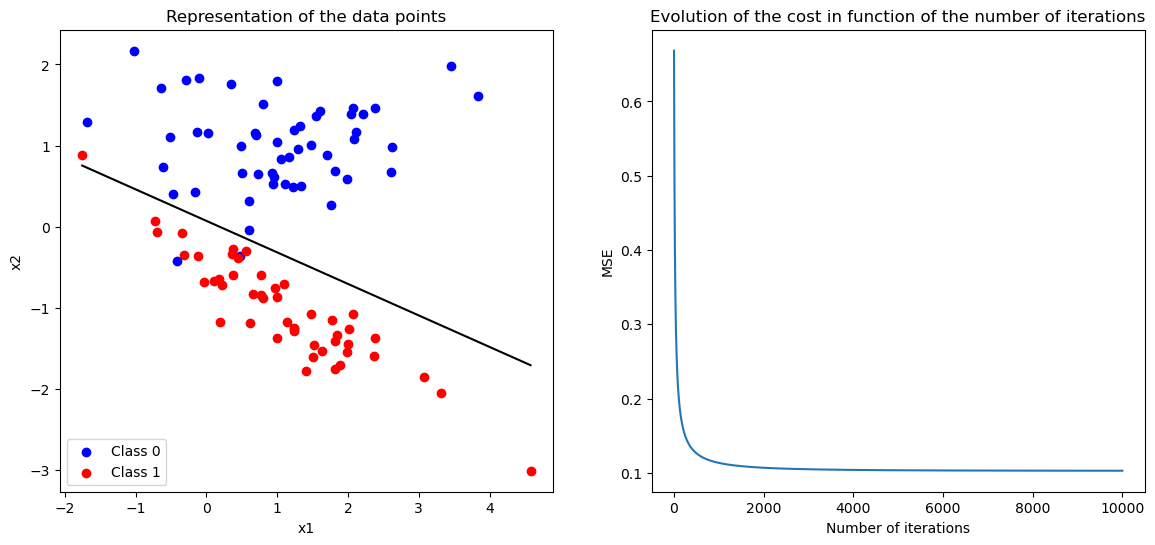

In [6]:
#Results with a learning rate of 0.1

parameters=np.array([[0],[0],[0]])
learning_rate=0.1
n_iterations=10000
tolerance=1e-6

final_parameters, cost_history, N_step=grad_descent(x,X, y, parameters, learning_rate, n_iterations, tolerance)

print(f"final parameters are w1={final_parameters[0]} w2={final_parameters[1]} and b={final_parameters[2]}")
print(f"The final cost obtained is {cost_function(X,y,final_parameters)}")


def predictions(X,parameters):
    predictions = np.where(model(X,parameters) >= 0.5, 1, 0)
    return predictions

final_predictions=predictions(X,final_parameters)

TP=[]
TN=[]
FP=[]
FN=[]

for i,j in zip(final_predictions,y):
    if i==1 and j==1:
        TP.append(i)
    elif i==1 and j==0:
        FP.append(i)
    elif i==0 and j==0:
        TN.append(i)
    elif i==0 and j==1:
        FN.append(i)

NTP=len(TP)
NTN=len(TN)
NFP=len(FP)
NFN=len(FN)

confusion_matrix=np.array([[NTP,NFN],[NFP,NTN]])
print(f"Confusion matrix is {confusion_matrix}")

Accuracy=(NTP+NTN)/(NTP+NTN+NFP+NFN)
Precision=NTP/(NTP+NFP)
Recall=NTP/(NTP+NFN)
F1_score=2*((Precision*Recall)/(Precision+Recall))

print(f"Accuracy is {Accuracy}")
print(f"Precision is {Precision}")
print(f"Recall is {Recall}")
print(f"F1 score is {F1_score}")



x_boundary=np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_boundary=(-final_parameters[2]-final_parameters[0]*x_boundary)/final_parameters[1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(x[:,0][y.ravel() == 0], x[:,1][y.ravel() ==0], color='blue', label='Class 0')
ax1.scatter(x[:,0][y. ravel() == 1], x[:,1][y.ravel() ==1],color='red', label='Class 1')
ax1.legend()
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Representation of the data points")
ax1.plot(x_boundary,y_boundary, color="black")


ax2.plot(N_step, cost_history)
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("MSE")
ax2.set_title("Evolution of the cost in function of the number of iterations")

final parameters are w1=[-0.22069322] w2=[-1.92989258] and b=[0.03918687]
The final cost obtained is 0.20719993083812768
Confusion matrix is [[47  1]
 [ 2 50]]
Accuracy is 0.97
Precision is 0.9591836734693877
Recall is 0.9791666666666666
F1 score is 0.9690721649484536


Text(0.5, 1.0, 'Evolution of the cost in function of the number of iterations')

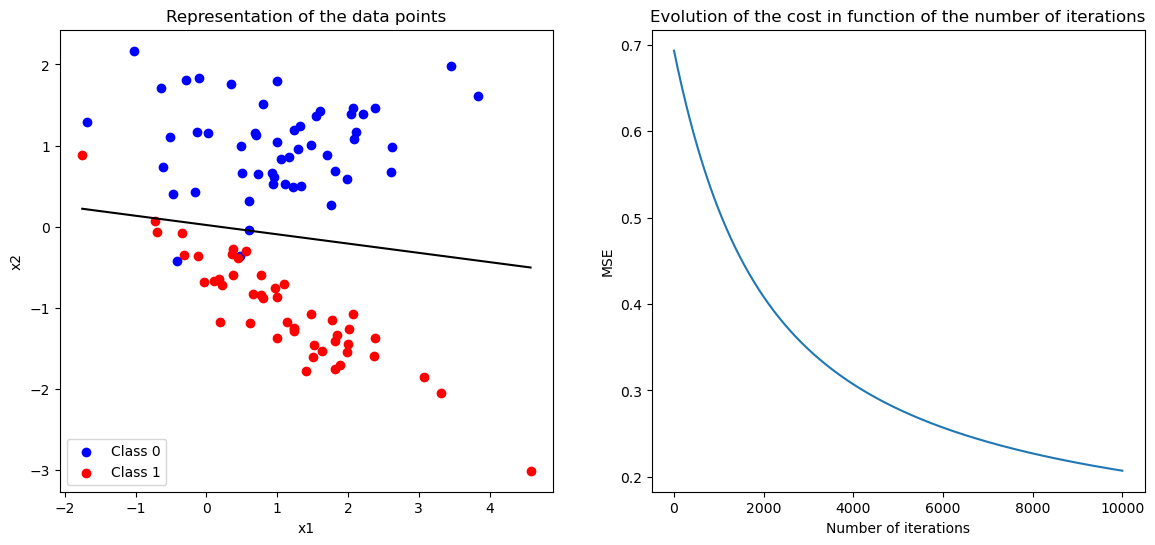

In [7]:
#Results with a learning rate of 0.001

parameters=np.array([[0],[0],[0]])
learning_rate=0.001
n_iterations=10000
tolerance=1e-6

final_parameters, cost_history, N_step=grad_descent(x,X, y, parameters, learning_rate, n_iterations, tolerance)

print(f"final parameters are w1={final_parameters[0]} w2={final_parameters[1]} and b={final_parameters[2]}")
print(f"The final cost obtained is {cost_function(X,y,final_parameters)}")


def predictions(X,parameters):
    predictions = np.where(model(X,parameters) >= 0.5, 1, 0)
    return predictions

final_predictions=predictions(X,final_parameters)

TP=[]
TN=[]
FP=[]
FN=[]

for i,j in zip(final_predictions,y):
    if i==1 and j==1:
        TP.append(i)
    elif i==1 and j==0:
        FP.append(i)
    elif i==0 and j==0:
        TN.append(i)
    elif i==0 and j==1:
        FN.append(i)

NTP=len(TP)
NTN=len(TN)
NFP=len(FP)
NFN=len(FN)

confusion_matrix=np.array([[NTP,NFN],[NFP,NTN]])
print(f"Confusion matrix is {confusion_matrix}")

Accuracy=(NTP+NTN)/(NTP+NTN+NFP+NFN)
Precision=NTP/(NTP+NFP)
Recall=NTP/(NTP+NFN)
F1_score=2*((Precision*Recall)/(Precision+Recall))

print(f"Accuracy is {Accuracy}")
print(f"Precision is {Precision}")
print(f"Recall is {Recall}")
print(f"F1 score is {F1_score}")



x_boundary=np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_boundary=(-final_parameters[2]-final_parameters[0]*x_boundary)/final_parameters[1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(x[:,0][y.ravel() == 0], x[:,1][y.ravel() ==0], color='blue', label='Class 0')
ax1.scatter(x[:,0][y. ravel() == 1], x[:,1][y.ravel() ==1],color='red', label='Class 1')
ax1.legend()
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Representation of the data points")
ax1.plot(x_boundary,y_boundary, color="black")


ax2.plot(N_step, cost_history)
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("MSE")
ax2.set_title("Evolution of the cost in function of the number of iterations")

In [8]:
#Construction of the logistic regression model with Sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report

model=LogisticRegression()
model.fit(x,y)
y_pred=model.predict(x)
coefficients = model.coef_
intercept = model.intercept_
y_pred_proba = model.predict_proba(x)[:,1]
log_loss_value = log_loss(y, y_pred)



cm = confusion_matrix(y, y_pred)
print(f"Confusion matrix:{cm}")

classification_rep = classification_report(y, y_pred)
print(f"Classification report:") 
print(classification_rep)
print(f"The coefficients obtained are {coefficients}")
print(f"The intercept obtained is b={intercept}")
print(f"The log loss value obtained is {log_loss_value}")



Confusion matrix:[[49  3]
 [ 1 47]]
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.94      0.98      0.96        48

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

The coefficients obtained are [[-0.76214504 -3.07121849]]
The intercept obtained is b=[0.38686674]
The log loss value obtained is 1.4417461355646861


C:\Users\sh032\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
